In [6]:
%cd .. 

c:\Users\josub\Desktop\BDMA\Brussels\Advanced Databases\PROJECT


In [7]:
!pip install pymysql seaborn
import pymysql
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Defaulting to user installation because normal site-packages is not writeable


In [8]:
from src import queries_sphinx
import importlib

# Reload the specific module
importlib.reload(queries_sphinx)

# Access the updated query_dictionary
query_dictionary = queries_sphinx.query_dictionary
query_dictionary

{1: "\n            SELECT id, Score \n            FROM comments \n            WHERE MATCH('@text Python')\n            ORDER BY Score DESC\n            ",
 2: "\n            SELECT id, Score\n            FROM posts \n            WHERE MATCH('@title Python') AND ClosedDate!=0\n            ORDER BY Score DESC\n            ",
 3: "\n            SELECT AccountId, Reputation, LastAccessDate \n            FROM users\n            WHERE MATCH('@AboutMe Python SQL (Java | Javascript)')\n            ORDER BY Reputation DESC, LastAccessDate DESC\n",
 4: "\n            SELECT id\n            FROM posts \n            WHERE MATCH('@body Python | SQL') AND FavoriteCount>3\n            ",
 5: "\n            SELECT id, CreationDate\n            FROM comments \n            WHERE MATCH('@text Python -SQL') AND CreationDate=2008\n            ",
 6: "\n            SELECT id, DownVotes\n            FROM users \n            WHERE MATCH('@AboutMe Python | SQL^2') and Downvotes=0\n            ORDER BY DownVote

Write the following command in the terminal (PowerShell): sphinx-3.7.1\bin\searchd --config sphinx-min.conf.dist

In [ ]:
conn = pymysql.connect(host="127.0.0.1", port=9306)
cursor = conn.cursor()
# Initialize a list to hold query metrics
query_metrics = []
TIMES=51
# Run benchmarks
for i in range(len(query_dictionary)):
    query = query_dictionary[i+1]
    
    print(f"Executing: {i+1}")
    for j in range(TIMES):
        start_time = time.time()
        cursor.execute(query)
        results = cursor.fetchall()
        end_time = time.time()
    
        # Collect execution time
        execution_time = end_time - start_time
        
        # Get number of rows and columns
        columns = [column[0] for column in cursor.description]  # Get column names
        num_rows = len(results)
        num_columns = len(columns)
        
        # Append metrics to the list
        query_metrics.append({
            'query_id':i+1,
            'query': query,
            'execution_time': execution_time,
            'num_rows': num_rows,
            'num_columns': num_columns,
            'run': j+1
        })

# Convert to pandas DataFrame

df = pd.DataFrame(query_metrics)
df


Executing: 1
Executing: 2
Executing: 3
Executing: 4
Executing: 5
Executing: 6
Executing: 7
Executing: 8
Executing: 9
Executing: 10
Executing: 11
Executing: 12
Executing: 13
Executing: 14
Executing: 15
Executing: 16
Executing: 17
Executing: 18


,query_id,query,execution_time,num_rows,num_columns,run
0,1,"\n SELECT id, Score \n F...",0.010894,20,2,1
1,1,"\n SELECT id, Score \n F...",0.000000,20,2,2
2,1,"\n SELECT id, Score \n F...",0.008523,20,2,3
3,1,"\n SELECT id, Score \n F...",0.004113,20,2,4
4,1,"\n SELECT id, Score \n F...",0.004551,20,2,5
...,...,...,...,...,...,...
895,18,"\n SELECT userid, (Age>18 OR ...",0.000000,4,3,46
896,18,"\n SELECT userid, (Age>18 OR ...",0.000000,4,3,47
897,18,"\n SELECT userid, (Age>18 OR ...",0.000000,4,3,48
898,18,"\n SELECT userid, (Age>18 OR ...",0.000000,4,3,49


In [11]:
# drop the first run to avoid cache problem
df_results = df[df['run']!=1] 
df_avg = df_results.groupby('query_id').agg({'execution_time':'mean'}).reset_index()

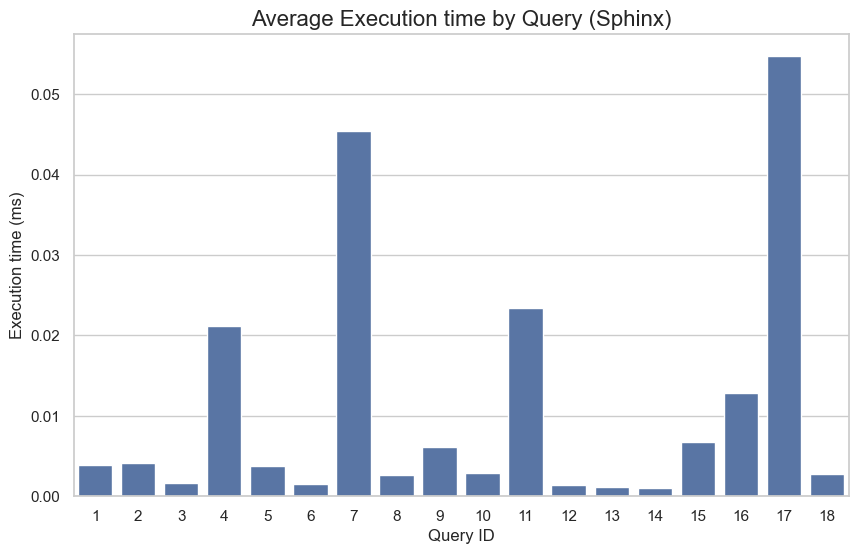

In [12]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.set(style="whitegrid")  # Set the style for the plot
sns.barplot(data=df_avg, x='query_id', y='execution_time')
# Add title and labels
plt.title("Average Execution time by Query (Sphinx)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (ms)", fontsize=12)
# Show the plot
plt.show()

C:\Users\josub\AppData\Local\Temp\ipykernel_20760\3399960262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['query_id'] = df_results['query_id'].astype(str)


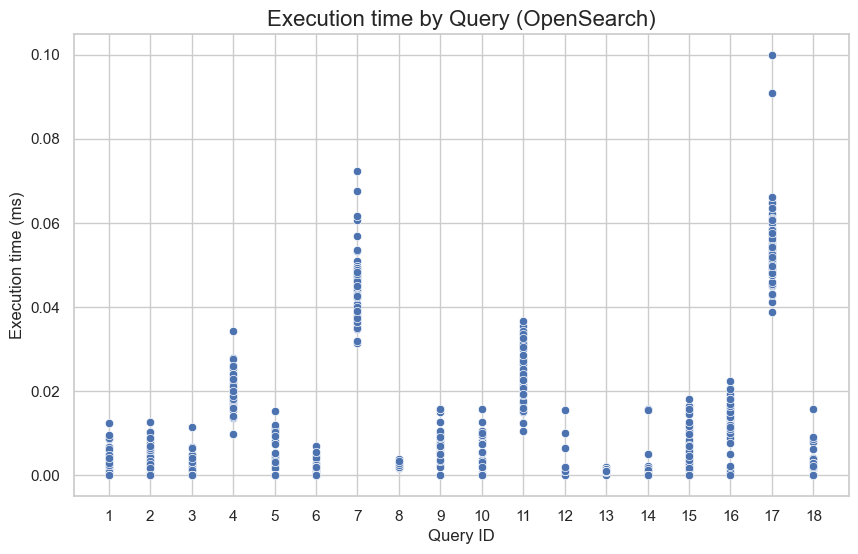

In [13]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.set(style="whitegrid")  # Set the style for the plot
df_results['query_id'] = df_results['query_id'].astype(str)
sns.scatterplot(data=df_results, x='query_id', y='execution_time')
# Add title and labels
plt.title("Execution time by Query (OpenSearch)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (ms)", fontsize=12)
# Show the plot
plt.show()

C:\Users\josub\AppData\Local\Temp\ipykernel_20760\857392085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['query_id'] = df_results['query_id'].astype(str)


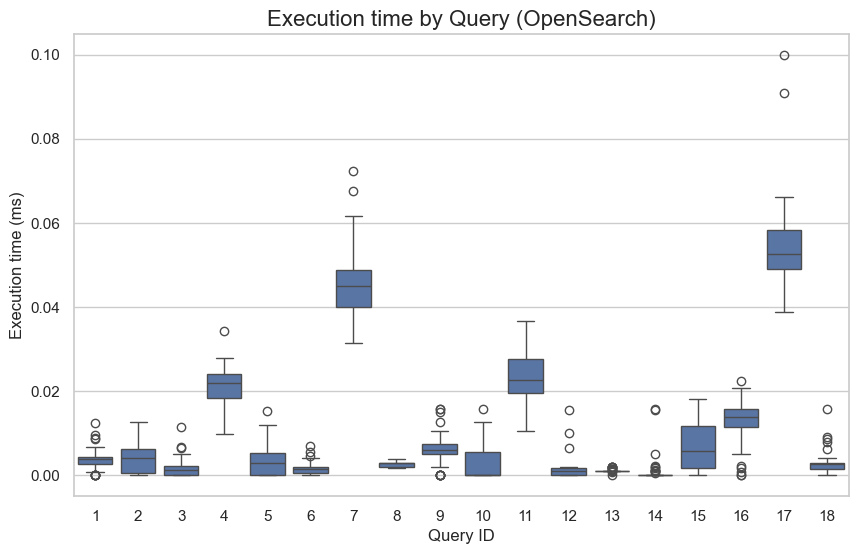

In [14]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.set(style="whitegrid")  # Set the style for the plot
df_results['query_id'] = df_results['query_id'].astype(str)
sns.boxplot(data=df_results, x='query_id', y='execution_time')
# Add title and labels
plt.title("Execution time by Query (OpenSearch)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (ms)", fontsize=12)
# Show the plot
plt.show()